### 경사하강법 (SGD : Stochastic Gradient Descent)
- 평균 제곱 오차의 값을 줄여나가는 것을 경사하강법이라고 한다. <br><br>

### 선형회귀와 경사하강법의 학습방법
- 모델의 최적화된 방법을 찾도록 도움을 주는 것 : 경사하강법(머신러닝 모델 X) <br><br>
- 가중치와 절편을 이용해 최적화된 모델을 찾아 주는 것 : 경사하강법 + 선형회귀 <br><br>

### 선형 회귀식의 가중치(w)와 절편(bias) : Y = wX + b
- 머신러닝 / 딥러닝의 학습이란? 데이터를 계속 업데이트 하면서 모델을 적용시키면서(함수식을 만들면서) 오차가 가장 적은 것을 기준으로 가중치와 절편을 찾는 것 <br><br>
- 규칙 : 가중치와 졀편을 계속 업데이트 하는 것 <br><br>
- 규제 : 가중치와 절편의 개수를 줄인다. <br><br>

---
### 당뇨병 환자 데이터

In [75]:
# bunch 클래스 라고 한다. 
from sklearn.datasets import load_diabetes

In [76]:
disabetes = load_diabetes()

In [77]:
# bunch 클래스 구성
disabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [78]:
print(disabetes.DESCR)
print(disabetes.data_filename)
print(disabetes.target_filename)
print(disabetes.data_module)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [79]:
# 데이터의 크기 확인하기
# sample 개수가 442개 feature가 10개
print(disabetes.data.shape)
print(disabetes.target.shape)

(442, 10)
(442,)


In [80]:
# data의 일부 보기
disabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034]])

In [81]:
# target 보기
disabetes.target[:3]

# feature name 보기
disabetes.feature_names

print(disabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

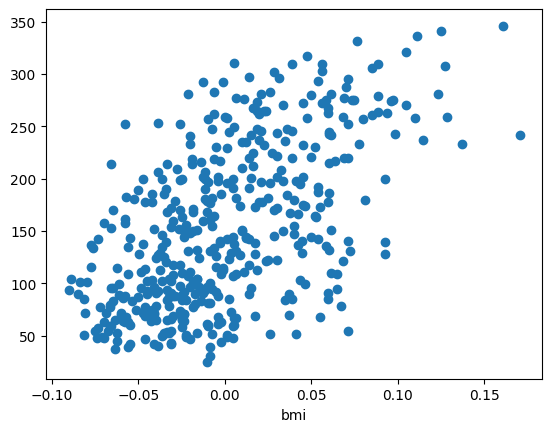

In [82]:
import matplotlib.pyplot as plt

plt.scatter(
    disabetes.data[:,2],
    disabetes.target
)

plt.xlabel('bmi')

plt.show()

In [83]:
# 상관 계수 알아보기
import numpy as np

np.corrcoef(disabetes.data[:,2],disabetes.target)

array([[1.        , 0.58645013],
       [0.58645013, 1.        ]])

---
### 경사 하강법
- 경사하강법은 모델이 데이터를 잘 표현할 수 있도록 기울기(변화율)을 사용하여 모델을 조금씩 조정하는 최적화 알고리즘 <br><br>

### 예측값과 변화율
- 변화율 = 0 이 되는 것을 찾는 것이다. (기울기와 같은 의미이다.) <br><br>
    - 변화율 = 0 : 최적화된 모델이다. <br><br>
- $y - \hat{y} = 0$ 인 것을 의미한다. <br><br>

### 예측값($\hat{y}$)
- 예측값은 하나의 모델에서 수식의 결과로 나온 값 <br><br>
    - 예측값이 정답값으로 수렴하게 만든다. <br><br>


---
### 훈련데이터에서 잘맞는 w와 b를 찾는 방법
1) 무작위로 w와 b를 정한다. <br><br>
2) x에서 샘플하나를 선택하여 $\hat{y}$을 계산 합니다. <br><br>
3) $\hat{y}$과 선택한 샘플의 진짜 ${y}$를 비교합니다. (오차 구하기) <br><br>
4) $\hat{y}$이 ${y}$와 가까와 지도록 w,b를 조정합니다. (모델 조정하기 : 학습하기) <br><br>
5) 모든 샘플을 처리할 떄 까지 2) ~ 4) 항목을 반복한다.

In [84]:
# 훈련데이터의 Feature와 Target 정하기
x = disabetes.data[:,2]
y = disabetes.target

In [85]:
# w와 b를 초기화 한다.
w = 1.0
b = 1.0

### 훈련데이터의 첫번째 sample 데이터로 $\hat{y}$ 계산하기

In [86]:
x[0] * w + b

1.0616962065186832

In [87]:
# target 과 예측 데이터 비교하기
print(y[0] ,',' , x[0] * w + b)

151.0 , 1.0616962065186832


#### - 당연한 결과지만 Target과 예측값이 너무 많은 차이가 발생한다. (오차가 너무 크다.)

### 경사 하강법(w 값을 조절하기)
: w 와 b를 조금씩 변경해서 y_hat이 증가하는지 감소하는지 살펴보기 <br><br>
- 논문에 쓰여 있지는 않지만, w와 b를 변경 시켰을 때 값이 얼마나 바뀌었는지 알고 있어야 된다. <br><br>
- 변화율을 알아야 하니까 <br><br>

In [88]:
# 0.1 올려보기 기울기
w_inc = w + 0.1
y_hat = w * x[0] + b
y_hat_inc = w_inc * x[0] + b

In [89]:
# 변화율 확인하기 : x[0] 값과 같다.
(y_hat_inc - y_hat) / (w_inc - w)

0.06169620651868429

In [90]:
# 변화율에 대한 증명은 끝났으니 다시 훈련데이터의 1번째 값으로 변화율을 구해보자.
w_inc = w + 10
y_hat = w * x[0] + b
y_hat_inc = w_inc * x[0] + b
w_rate=(y_hat_inc - y_hat) / (w_inc - w)

In [91]:
# 변화율을 가중치로 업데이트 하기 <- 학습하기
w_new = w + w_rate
w_new

1.0616962065186832

In [92]:
# 변화율로 절편 업데이트 하기
b_inc = b + 0.1
y_hat_inc = w * x[0] + b_inc
b_rate=(y_hat_inc - y_hat) / (b_inc - b)
b_rate

1.0

### 오차 역전파 (backpropagation)

In [93]:
# 오차 역전파로 가중치와 절편을 업데이트 합니다. (손실함수(비용함수)를 구성함)
# 오차 역전파는 y^ 과 y의 차이를 이용하여 w와 b를 업데이트 합니다.
# 오차와 변화율을 곱하여 가중치를 업데이트 한다. 

err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + b_rate * err
print(err, w_new , b_new)

149.9383037934813 10.2506245559037 150.9383037934813


In [94]:
# 2번째 샘플 x[1]을 사용하고 오차를 구하고 새로운 w와 b를 구하기
y_hat = w_new * x[1] + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + b_rate * err
print(err, w_new , b_new)

-75.41066251735478 14.132317616380549 75.52764127612653


#### 반복문을 통해 전체 샘플을 반복하기

In [95]:
w = b = 1
for x_i, y_i in zip(x,y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + err

print(w , b)

587.8654539985616 99.4093556453094


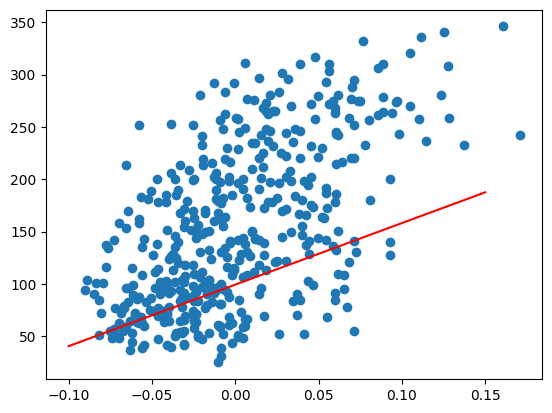

In [96]:
import matplotlib.pyplot as plt

plt.scatter(
    disabetes.data[:,2],
    disabetes.target
)

pt1 = [-0.1 , -0.1 * w + b]
pt2 = [0.15 , 0.15 * w + b]

plt.plot(
    [pt1[0] , pt2[0]],
    [pt1[1] , pt2[1]],
    'r'
)

plt.show()

### Epoch(에포크 / 영어 : 이팍)로 반복하기 : w 와 b를 반복적으로 계산하기

In [97]:
w = b = 1
for _ in range(100): # _ 들어가는게 의미가 없을 때
    for x_i, y_i in zip(x,y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + err

print(w , b)

913.5973364346786 123.39414383177173


---
### 모델 만들기 정리
1) w 와 b를 임의의 값 (1,1)로 초기화 하고 훈련데이터의 샘플을 하나씩 대입하여 y와 $\hat{y}$의 오차를 구한다. <br><br>
2) 1에서 구한 오차를 w와 b의 변화율에 곱하고 이 값을 이용하여 w와 b를 업데이트 한다. (학습한다) <br><br>
3) 만약 y^이 y보다 커지는 오차는 음수가 되어 자동으로 w와 b가 줄어드는 방향으로 업데이트 한다.  <br><br>
4) 반대로 y^이 y보다 작으면 오차는 양수가 되어 w와 b는 더 커지도록 업데이트 된다. <br><br>

---
### 선형 회귀를 위한 Class 만들기

In [98]:
class LRModel:
    # 초기화 작업
    def __init__(self):
        self.w = 1.0 # 가중치를 초기화
        self.b = 1.0 # bias를 초기화

    # 정방향 계산
    def forpass(self,x):
        y_hat = x * self.w + self.b
        return y_hat
    
    # 역방향 계산(오차율이 들어감)
    def backprop(self,x,err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad , b_grad
    
    # 훈련
    def fit(self,x,y,epoch): # w,b는 처음에만 1로 초기화 되고 epoch의 크기에 따라 계속 바뀜
        for _ in range(epoch):
            for x_i , y_i in zip(x,y):
                y_hat = self.forpass(x_i)
                err = y_i - y_hat
                w_grad , b_grad = self.backprop(x_i,err)
                self.w += w_grad
                self.b += b_grad
        
        return self.w , self.b

In [99]:
lrmodel = LRModel()

w,b=lrmodel.fit(x,y,100)

print(w,b)


913.5973364346786 123.39414383177173


---
# 용어 정리
### 선형 회귀
선형방정식을 사용하여 연속적인 값을 예측하는 알고리즘으로 데이터를 가장 잘 표현하는 방정식의 계수를 구할 수 있다. <br><br>
머신러닝 알고리즘이지만 딥러닝에서 사용하는 인공신경망 알고리즘의 기초가 된다. <br><br>

### 경사하강법
최적화 알고리즘 중의 하나로 핵심 훈련 알고리즘 이다. <br><br>
이 방법은 최적의 모델을 만드는 가중치를 한번에 찾지 않습니다. <br><br>
먼저 임의로 정한 가중치에서 출력을 만든 후 타깃과 비교하여 오차를 줄이는 방향으로 가중치를 조정한다. <br><br>
이런 과정의 모든 훈련 샘플링에 대해서 반복하면서 최적의 가중치를 찾는다. 

### 손실 함수
모델이 얼마 만큼의 오류가 있는지 측정하는 기준이다. <br><br>
함수의 값을 최소로 만드는 것이 이 모델 훈련의 목적이다. <br><br>
비용함수(cost function)또는 목적함수(objective function)이라고도 부른다. <br><br>

### 선형회귀 -> 로지스틱 회귀 -> 인공신경망 -> 딥러닝